In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# df = pd.read_csv('infarc.csv')
df = pd.read_csv('temp.csv')
df

,temperature,yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [12]:
x = df['temperature']
y = df['yield']

In [13]:
x_b = np.c_[np.ones(x.shape[0]),x**3, x**2,x]
x_b

array([[1.00e+00, 1.25e+05, 2.50e+03, 5.00e+01],
       [1.00e+00, 1.25e+05, 2.50e+03, 5.00e+01],
       [1.00e+00, 1.25e+05, 2.50e+03, 5.00e+01],
       [1.00e+00, 3.43e+05, 4.90e+03, 7.00e+01],
       [1.00e+00, 3.43e+05, 4.90e+03, 7.00e+01],
       [1.00e+00, 3.43e+05, 4.90e+03, 7.00e+01],
       [1.00e+00, 5.12e+05, 6.40e+03, 8.00e+01],
       [1.00e+00, 5.12e+05, 6.40e+03, 8.00e+01],
       [1.00e+00, 5.12e+05, 6.40e+03, 8.00e+01],
       [1.00e+00, 7.29e+05, 8.10e+03, 9.00e+01],
       [1.00e+00, 7.29e+05, 8.10e+03, 9.00e+01],
       [1.00e+00, 7.29e+05, 8.10e+03, 9.00e+01],
       [1.00e+00, 1.00e+06, 1.00e+04, 1.00e+02],
       [1.00e+00, 1.00e+06, 1.00e+04, 1.00e+02],
       [1.00e+00, 1.00e+06, 1.00e+04, 1.00e+02]])

In [14]:
coeff = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
coeff

array([ 2.10515723e+01, -3.40146751e-05,  8.76572327e-03, -7.14287212e-01])

In [17]:
y_pred = x_b @ coeff
y_pred

rmse = np.sqrt(np.mean((y-y_pred)**2))
rmse

0.19667572732566055

[]

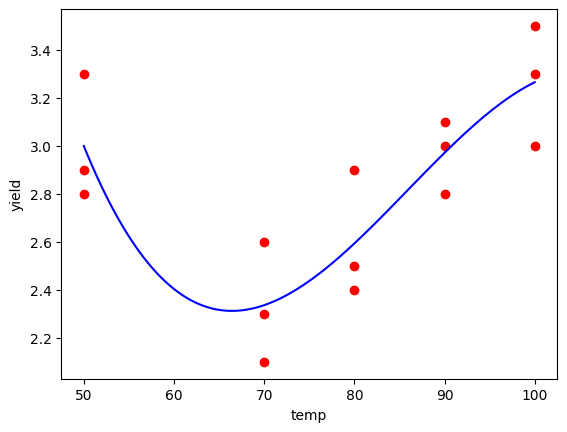

In [22]:
# plt.figure(figsize=(12,6))
x_all = np.linspace(np.max(x), np.min(x) , 100)
x_new = np.c_[np.ones(x_all.shape[0]),x_all**3 ,x_all**2,x_all]
y_pred = x_new @ coeff

plt.scatter(x,y,label="data points",color='red')
plt.plot(x_all,y_pred,label="quadratic",color='blue')
plt.xlabel("temp")
plt.ylabel('yield')
plt.plot()